# Divergent Association Scores Comparison

## dependencies

In [1]:
import sys
sys.path.append('..') 
import numpy as np
from scripts.multiple_test import analyze_results, create_heatmap, most_common_words, create_bar_plot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import ast
warnings.filterwarnings('ignore')

In [2]:
colors = {
    # Human baseline
    'Human (100k)': '#4D4D4D',

    # GPT-4 family (Teal shades with variants for ety, opp, thes)
    'GPT-4_mid_DAT': '#008080',
    'GPT-4_mid_control': '#66CCCC',
    'GPT-4-turbo_mid_DAT': '#008080',
    'GPT-4-turbo_mid_control': '#66CCCC',
    'GPT-4-0613_mid_DAT': '#008080',
    'GPT-4-0613_mid_control': '#66CCCC',
    'GPT-4-1106_mid_DAT': '#008080',
    'GPT-4-1106_mid_control': '#66CCCC',
    'GPT-4o_mid_DAT': '#008080',
    'GPT-4o_mid_control': '#66CCCC',
    'GPT-4o-mini_mid_DAT': '#008080',
    'GPT-4o-mini_mid_control': '#66CCCC',
    'GPT-4_mid_ety': '#20B2AA',      # Light Sea Green for distinction
    'GPT-4_mid_thes': '#5F9EA0',     # Cadet Blue
    'GPT-4_mid_opp': '#2E8B57',      # Sea Green
    'o4-mini_mid_DAT': '#008080',  # o4-mini
    'GPT-4.1_mid_DAT': '#008080',  # GPT-4.1


    # GPT-3 family (Green shades)
    'GPT-3_mid_DAT': '#006400',
    'GPT-3_mid_control': '#66A366',
    'GPT-3_mid_ety': '#4CAF50',      # Medium Green for contrast
    'GPT-3_mid_thes': '#98FB98',     # Pale Green
    'GPT-3_mid_opp': '#32CD32',      # Lime Green

    # Claude family (Orange shades)
    'Claude_mid_DAT': '#FF8C00',
    'Claude_mid_control': '#FFD39B',
    'Claude2.1_mid_DAT': '#FF8C00',
    'Claude2.1_mid_control': '#FFD39B',
    'Claude3_mid_DAT': '#FF8C00',
    'Claude3_mid_control': '#FFD39B',
    'Claude3.5-sonnet_mid_DAT': '#FF8C00',
    'Claude3.5-sonnet_mid_control': '#FFD39B',
    'Claude_mid_ety': '#FF6347',     # Tomato Red
    'Claude_mid_thes': '#FFA07A',    # Light Salmon
    'Claude_mid_opp': '#FF4500',     # Orange Red

    # Google family (Blue shades)
    'GeminiPro1_mid_DAT': '#1E90FF',     # Dodger Blue
    'GeminiPro1_mid_control': '#87CEFA', # Light Sky Blue
    'GeminiPro1_mid_ety': '#4682B4',     # Steel Blue
    'GeminiPro1_mid_thes': '#00BFFF',    # Deep Sky Blue
    'GeminiPro1_mid_opp': '#5F9EA0',     # Cadet Blue
    'GeminiPro1.5_mid_DAT': '#1E90FF',
    'GeminiPro1.5_mid_control': '#87CEFA',
    'GeminiFlash1.5_mid_DAT': '#1E90FF',
    'GeminiFlash1.5_mid_control': '#87CEFA',
    'GeminiFlash2.5_mid_DAT': '#1E90FF',
    'GeminiFlash2.5_mid_control': '#87CEFA',    
    'GeminiPro2.5_mid_DAT': '#1E90FF',
    'Gemma2_mid_DAT': '#1E90FF',
    'Gemma2_mid_control': '#87CEFA',
    'Gemma3_mid_DAT': '#1E90FF',
    
    # Meta/Llama family (Purple shades)
    'Llama3_mid_DAT': '#6A0DAD',       # Purple
    'Llama3_mid_control': '#B19CD9',   # Light Purple
    'Llama3.1_mid_DAT': '#6A0DAD',
    'Llama3.1_mid_control': '#B19CD9',
    'Llama3.1_mid_ety': '#8A2BE2',     # Blue Violet
    'Llama3.1_mid_thes': '#DA70D6',    # Orchid
    'Llama3.1_mid_opp': '#DDA0DD',     # Plum
    'Llama3.2_mid_DAT': '#6A0DAD',
    'Llama3.2_mid_control': '#B19CD9',
    'Llama3-70B_mid_DAT': '#6A0DAD',
    'Llama3-70B_mid_control': '#B19CD9',
    'Llama4_mid_DAT': '#6A0DAD',       # Purple
    'Llama4_mid_control': '#B19CD9',   # Light Purple

    # Other models (Distinctive colors for each)
    'StableLM_mid_DAT': '#556B2F',     # Dark Olive Green
    'StableLM_mid_control': '#8FBC8F', # Dark Sea Green
    'RedPajama_mid_DAT': '#B22222',    # Firebrick Red
    'RedPajama_mid_control': '#F08080',# Light Coral
    'Vicuna_mid_DAT': '#7B68EE',       # Medium Slate Blue
    'Vicuna_mid_control': '#9370DB',   # Medium Purple
    'Vicuna_mid_ety': '#7B68EE',
    'Capybara_mid_DAT': '#8B4513',     # Saddle Brown
    'Capybara_mid_control': '#D2B48C',  # Tan
    'Qwen3-8B_mid_DAT': '#8B0000',      # Dark Red
    'Qwen3-8B_mid_control': '#CD5C5C',  # Indian Red
    'Hermes3_mid_DAT': '#2d50ff'
}


## Load all machine and human data

In [3]:
results_df = pd.read_csv('concatenated_results_2025-06-18.csv')

In [4]:
# convert string to list, handling NaN values
results_df['Words'] = results_df['Words'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
models_with_nan_words = results_df[results_df['Words'].isna()]['Model'].unique()
print(models_with_nan_words)

['Human (100k)']


## Get top 3 words

In [9]:
import pandas as pd

# Assuming df is your dataframe
filtered_df = results_df[
    (results_df['Model'] == 'GPT-4') & 
    (results_df['Control'] == 'Original instructions') &
    (results_df['Strategy'] == 'Original instructions') 
]

# Filter and get top 3 lists for each temperature level
top_3_low = filtered_df[filtered_df['Temperature'] == 'Low'].nlargest(3, 'Score')
top_3_mid = filtered_df[filtered_df['Temperature'] == 'Mid'].nlargest(3, 'Score')
top_3_high = filtered_df[filtered_df['Temperature'] == 'High'].nlargest(3, 'Score')

# Concatenate the results
result = pd.concat([top_3_low, top_3_mid, top_3_high])

# Prepare the formatted text
formatted_text = ""

for index, row in result.iterrows():
    formatted_text += "Temperature: {}\n".format(row['Temperature'])
    formatted_text += "Score: {}\n".format(row['Score'])
    words = row['Words']
    formatted_text += "Words: {}\n\n------\n".format(", ".join(words))

# Save the formatted text to a file
with open('top_word_lists.txt', 'w') as file:
    file.write(formatted_text)


# 2. Quality control manipulations
## Most common words in humans

In [10]:
import pandas as pd
import collections

#load DAT Olson's data
filename = "../human_data_dat/study2.tsv"

# read the data into a DataFrame
df_human = pd.read_csv(filename, sep='\t')

n_words = 5  # Set the number of most common words to find

# Concatenate all the words from columns 'word.1' to 'word.10'
all_words = df_human.loc[:, 'word.1':'word.10'].values.flatten()

# Count the occurrences of each word
word_counter = collections.Counter(all_words)

# Find the n most common words
most_common_words_humans = word_counter.most_common(n_words)

# Calculate the percentage of occurrences for each of the n most common words
total_words = len(all_words)
most_common_words_percentage = [(word, count / total_words * 1000) for word, count in most_common_words_humans]

# Print the n most common words with their percentages
print(f"Top {n_words} most common words with their percentage of occurrence:")
for word, percentage in most_common_words_percentage:
    print(f"{word}: {percentage:.2f}%")



'''car      1000000 13820   1.38
dog      1000000 12394   1.24
tree     1000000 10199   1.02
cat      1000000  7904   0.790
book     1000000  7035   0.704
house    1000000  6171   0.617
water    1000000  5651   0.565
mountain 1000000  5649   0.565
computer 1000000  5216   0.522
cloud    1000000  4959   0.496'''



Top 5 most common words with their percentage of occurrence:
Car: 11.68%
Tree: 9.40%
Dog: 8.38%
car: 8.03%
Book: 6.44%


'car      1000000 13820   1.38\ndog      1000000 12394   1.24\ntree     1000000 10199   1.02\ncat      1000000  7904   0.790\nbook     1000000  7035   0.704\nhouse    1000000  6171   0.617\nwater    1000000  5651   0.565\nmountain 1000000  5649   0.565\ncomputer 1000000  5216   0.522\ncloud    1000000  4959   0.496'

## Word counts

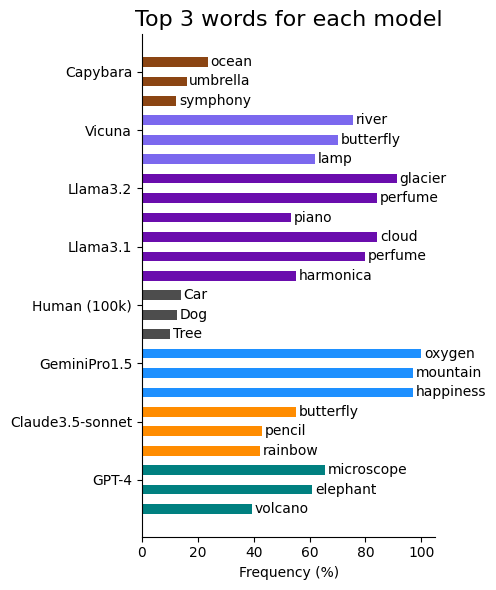

In [11]:
# Add the human data
human_data = [("Tree", 10.2), ("Dog", 12.4), ("Car", 13.8)]
model_word_counts = []

# Assuming results_df is already loaded
model_names = ['GPT-4', 'Claude3.5-sonnet', 'GeminiPro1.5', 'Human (100k)',  'Llama3.1', 'Llama3.2', 'Vicuna', 'Capybara', ]

n_words = 3

# Iterate over all models and accumulate the word counts
for model_name in model_names:  # Exclude the last model_name, "Human"
    temp = 'Mid'
    strategy = 'Original instructions'

    df = results_df.loc[(results_df['Model'] == model_name) & (results_df['Strategy'] == strategy) &
                        (results_df['Temperature'] == temp)].dropna()

    all_words = df['Words'].tolist()
    # flat list
    all_words = [item for sublist in all_words for item in sublist]
    
    n_lists = len(df['Words'])
    word_counts = most_common_words(all_words, n_words)
    word_counts_percentage = [(word, count / len(all_words) * 10 * 100) for word, count in word_counts]
    model_word_counts.append(sorted(word_counts_percentage, key=lambda x: x[1], reverse=False))

# Add the human data to model_word_counts at the beginning
model_word_counts.insert(3, human_data)
#remove empty lists
model_word_counts = [x for x in model_word_counts if x != []]
# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(5, 6))

bar_width = 0.50
bar_positions = [i for i in range(n_words * len(model_names))]

for i, (model_name, word_counts) in enumerate(zip(model_names, model_word_counts)):
    word_labels, counts = zip(*word_counts)
    for j, (word, count) in enumerate(zip(word_labels, counts)):
        if model_name == 'Human (100k)':
            color = colors[model_name]
        else:
            color = colors[f"{model_name}_mid_DAT"]
        ax.barh(bar_positions[i * n_words + j], count, bar_width, color=color)
        ax.text(count + 1, bar_positions[i * n_words + j], word, va='center')
# set model names
ax.set_yticks([(i * n_words) + n_words / 2 for i in range(len(model_names))])
ax.set_yticklabels(model_names)
# axes names
ax.set_xlabel('Frequency (%)')
ax.set_title('Top 3 words for each model', fontsize=16)
# remove box frame
ax.spines['top'].set_visible(False)
# remove right frame
ax.spines['right'].set_visible(False)
plt.tight_layout()

# Save the plot
plt.savefig(f"./figures/top{n_words}_words_percentage.png", dpi=300)

# Show the plot
plt.show()


# 3. Main analyses
## Divergent Association Scores across Models
Instructions for the task are taken from Olson et al. (2019) - [datcreativity.com](datcreativity.com)

In [6]:
def subsample_humans_only(group):
    # Get the name of the model for the current group
    model_name = group.name

    if model_name == 'Human (100k)':
        # For humans, sort by score and take the top 20%
        n_top = int(len(group) * 0.10)
        return group.sort_values('Score', ascending=False).head(n_top).sample(n=min(len(group), 500), random_state=42)
    else:
        # For all other models, take a random sample of 500
        return group.sample(n=min(len(group), 500), random_state=32)
def custom_sampler(group):
    # Get the name of the model for the current group
    model_name = group.name
    # For all, sort by score and take the top 20%
    n_top = int(len(group) * 0.1)
    return group.sort_values('Score', ascending=False).head(n_top).sample(n=min(len(group), 30), random_state=32)

In [7]:
results_df['Model'].unique()

array(['Capybara', 'Claude2.1', 'Claude3', 'DeepSeek-R1', 'GeminiPro2.5',
       'GeminiFlash2.5', 'GeminiFlash-thinking', 'GeminiPro1', 'Gemma2',
       'Gemma3', 'GPT-4-0613', 'GPT-4-1106', 'GPT-4-turbo', 'Llama3.1',
       'Llama3.2', 'Llama3-70B', 'Llama3', 'Llama4', 'Qwen3-8B', 'GPT-3',
       'Claude3.5-sonnet', 'Claude', 'GeminiFlash', 'GeminiPro1.5',
       'GPT-4.1', 'GPT-4', 'GPT-4o-mini', 'GPT-4o', 'Hermes3', 'o4-mini',
       'RedPajama', 'StableLM', 'Vicuna', 'Human (100k)'], dtype=object)

## Latest model Show Down

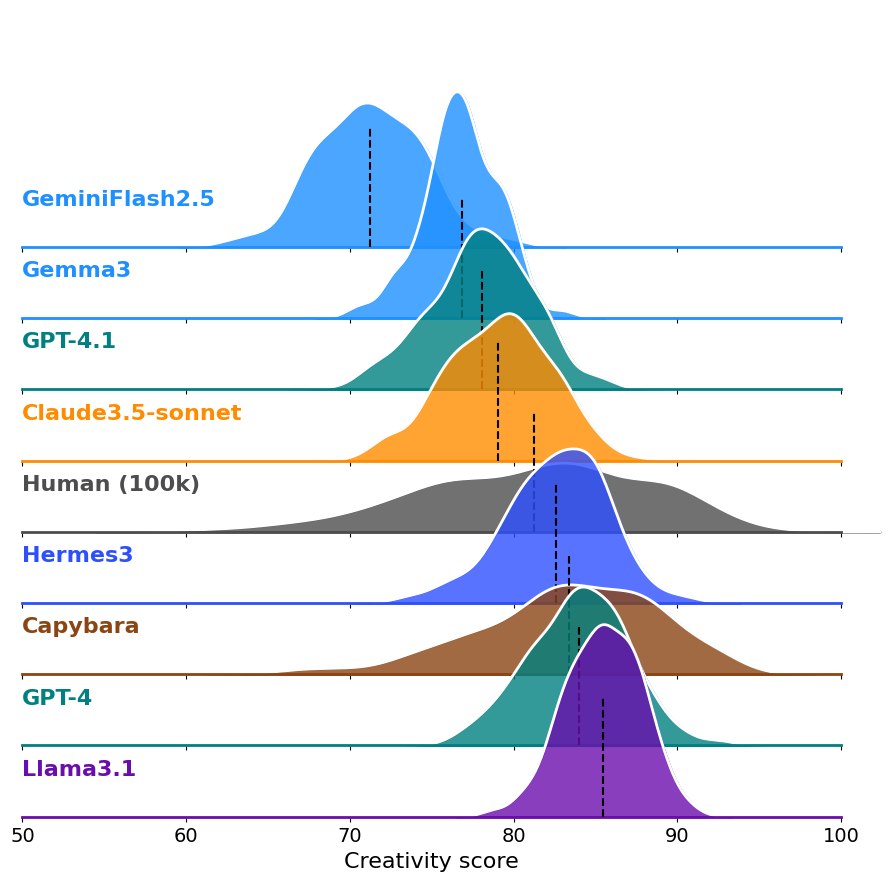

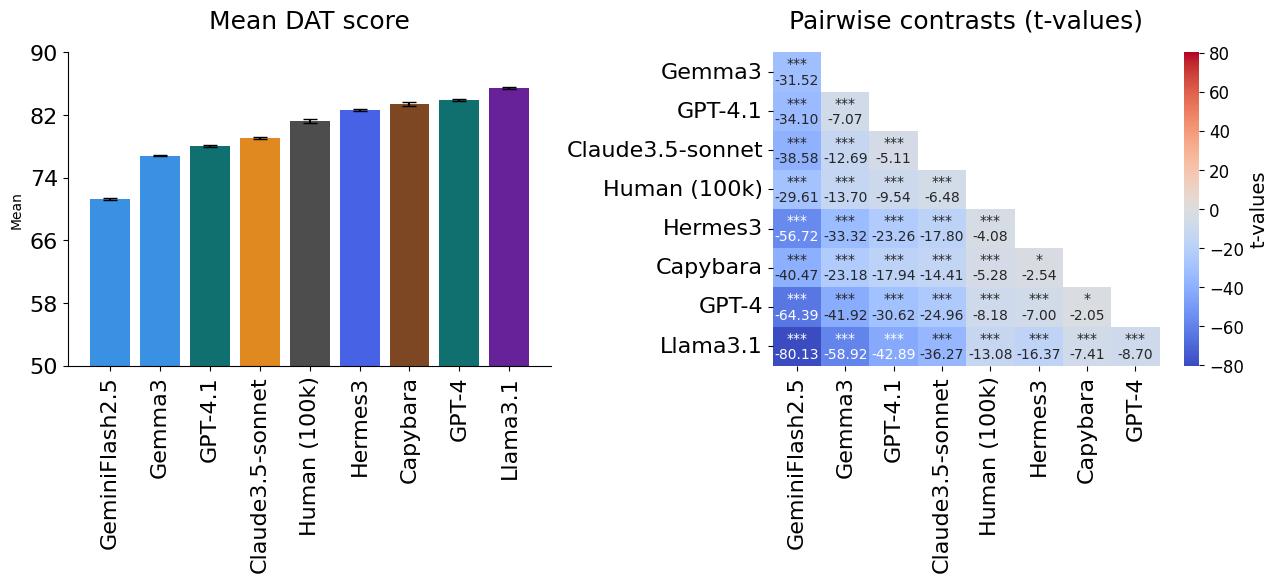

In [75]:
# Initialize the FacetGrid object
pal = [colors['GeminiFlash2.5_mid_DAT'],
       colors['Gemma3_mid_DAT'],
       colors['GPT-4.1_mid_DAT'],
       colors['Claude3.5-sonnet_mid_DAT'],
       colors['Human (100k)'],
       colors['Hermes3_mid_DAT'],
       colors['Capybara_mid_DAT'],
       colors['GPT-4_mid_DAT'],
       colors['Llama3.1_mid_DAT'],

    ]

df = results_df.loc[(results_df['Strategy']=='Original instructions') &
                    (results_df['Temperature']=='Mid') | (results_df['Temperature'].isnull())]

models = ['GPT-4', 'Claude3.5-sonnet', 'GeminiFlash2.5', 'GPT-4.1',
          'Llama3.1', 'Capybara', 'Gemma3', 'Human (100k)', 'Hermes3']

df = df[df['Model'].isin(models)]

# Filter outliers and sample data
df = df.groupby('Model').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
df = df.groupby('Model').apply(lambda x: x.sample(min(len(x), 500), random_state=32)).reset_index(drop=True)
order = df.groupby('Model')['Score'].mean().sort_values(ascending=True).index
g = sns.FacetGrid(df, row="Model", hue="Model", aspect=9, height=1, row_order=order, palette=pal, hue_order=order)

# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "Score")
mean_conf, pvals, tvals, cohensd = analyze_results(df, 'Model', order)
# Add vertical lines for mean and confidence intervals
for ax, model in zip(g.axes.flat, order):
    ax.axvline(mean_conf[mean_conf['Model'] == model]['mean'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)

for ax in g.axes.flat:
    ax.set_xlabel('Creativity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.7)  # Adjust this value to reduce the space between axes
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xlim=(50, 100))
g.savefig('figures/DAT_LLMs_humans_ridge_mean_final', dpi=300)
create_heatmap(mean_conf, 'Model', tvals_table=tvals, pvals_table=pvals,
               pal=pal, order=order, xlim=(50,90), save='figures/DAT_GPT_humans_models_final', large=(13, 6))

## All models

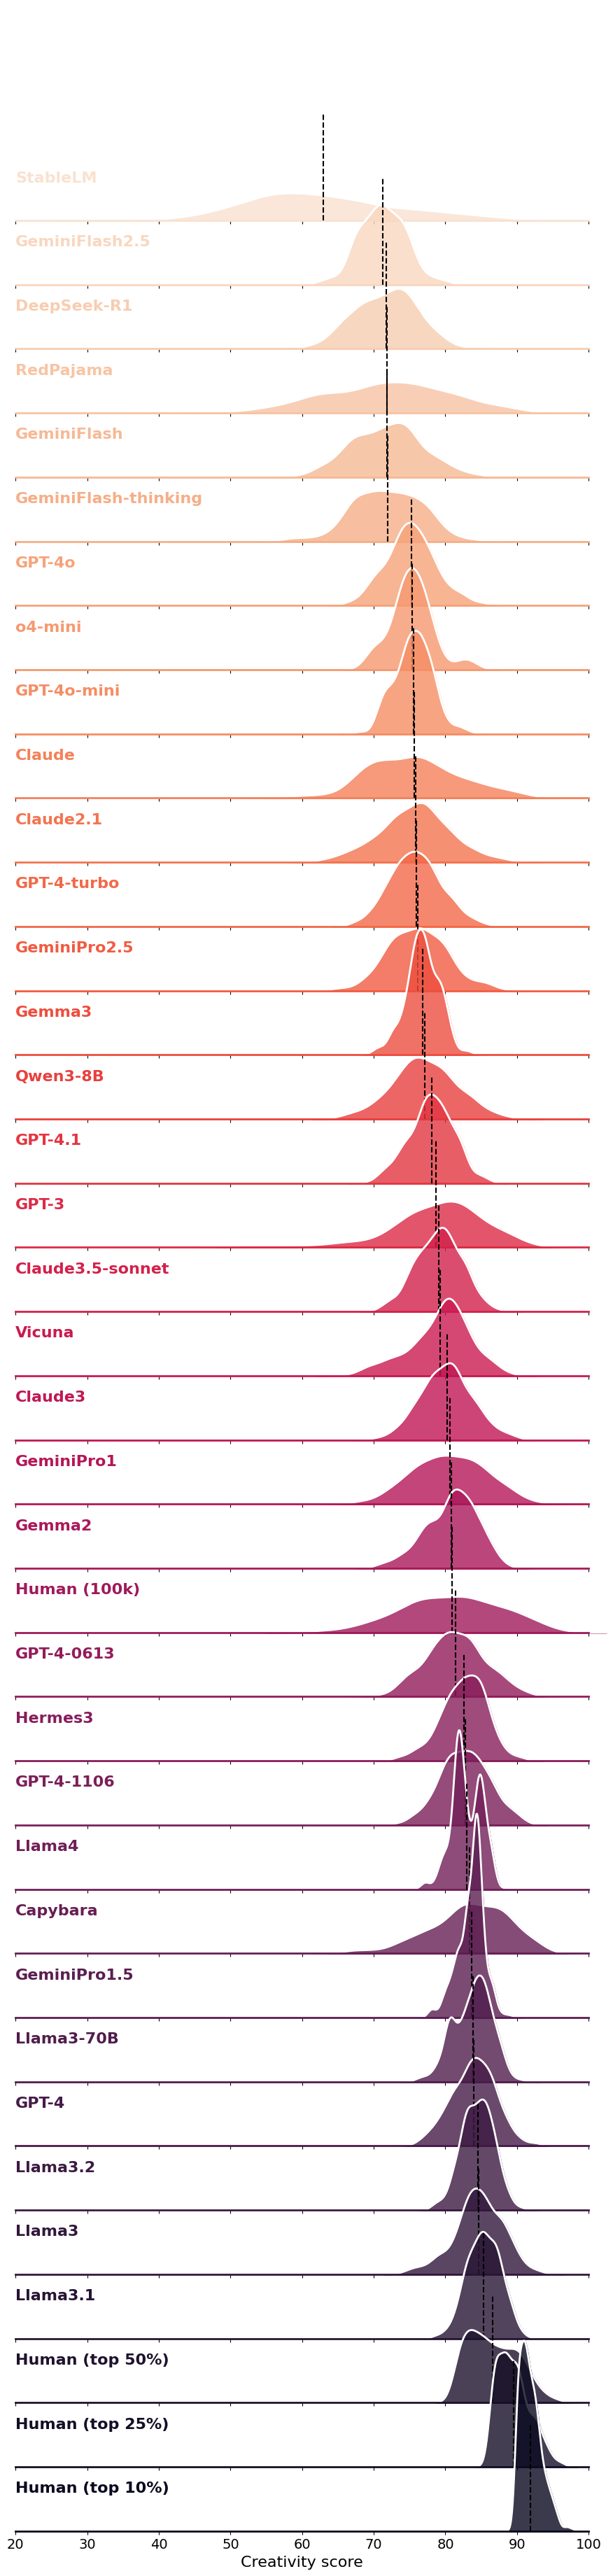

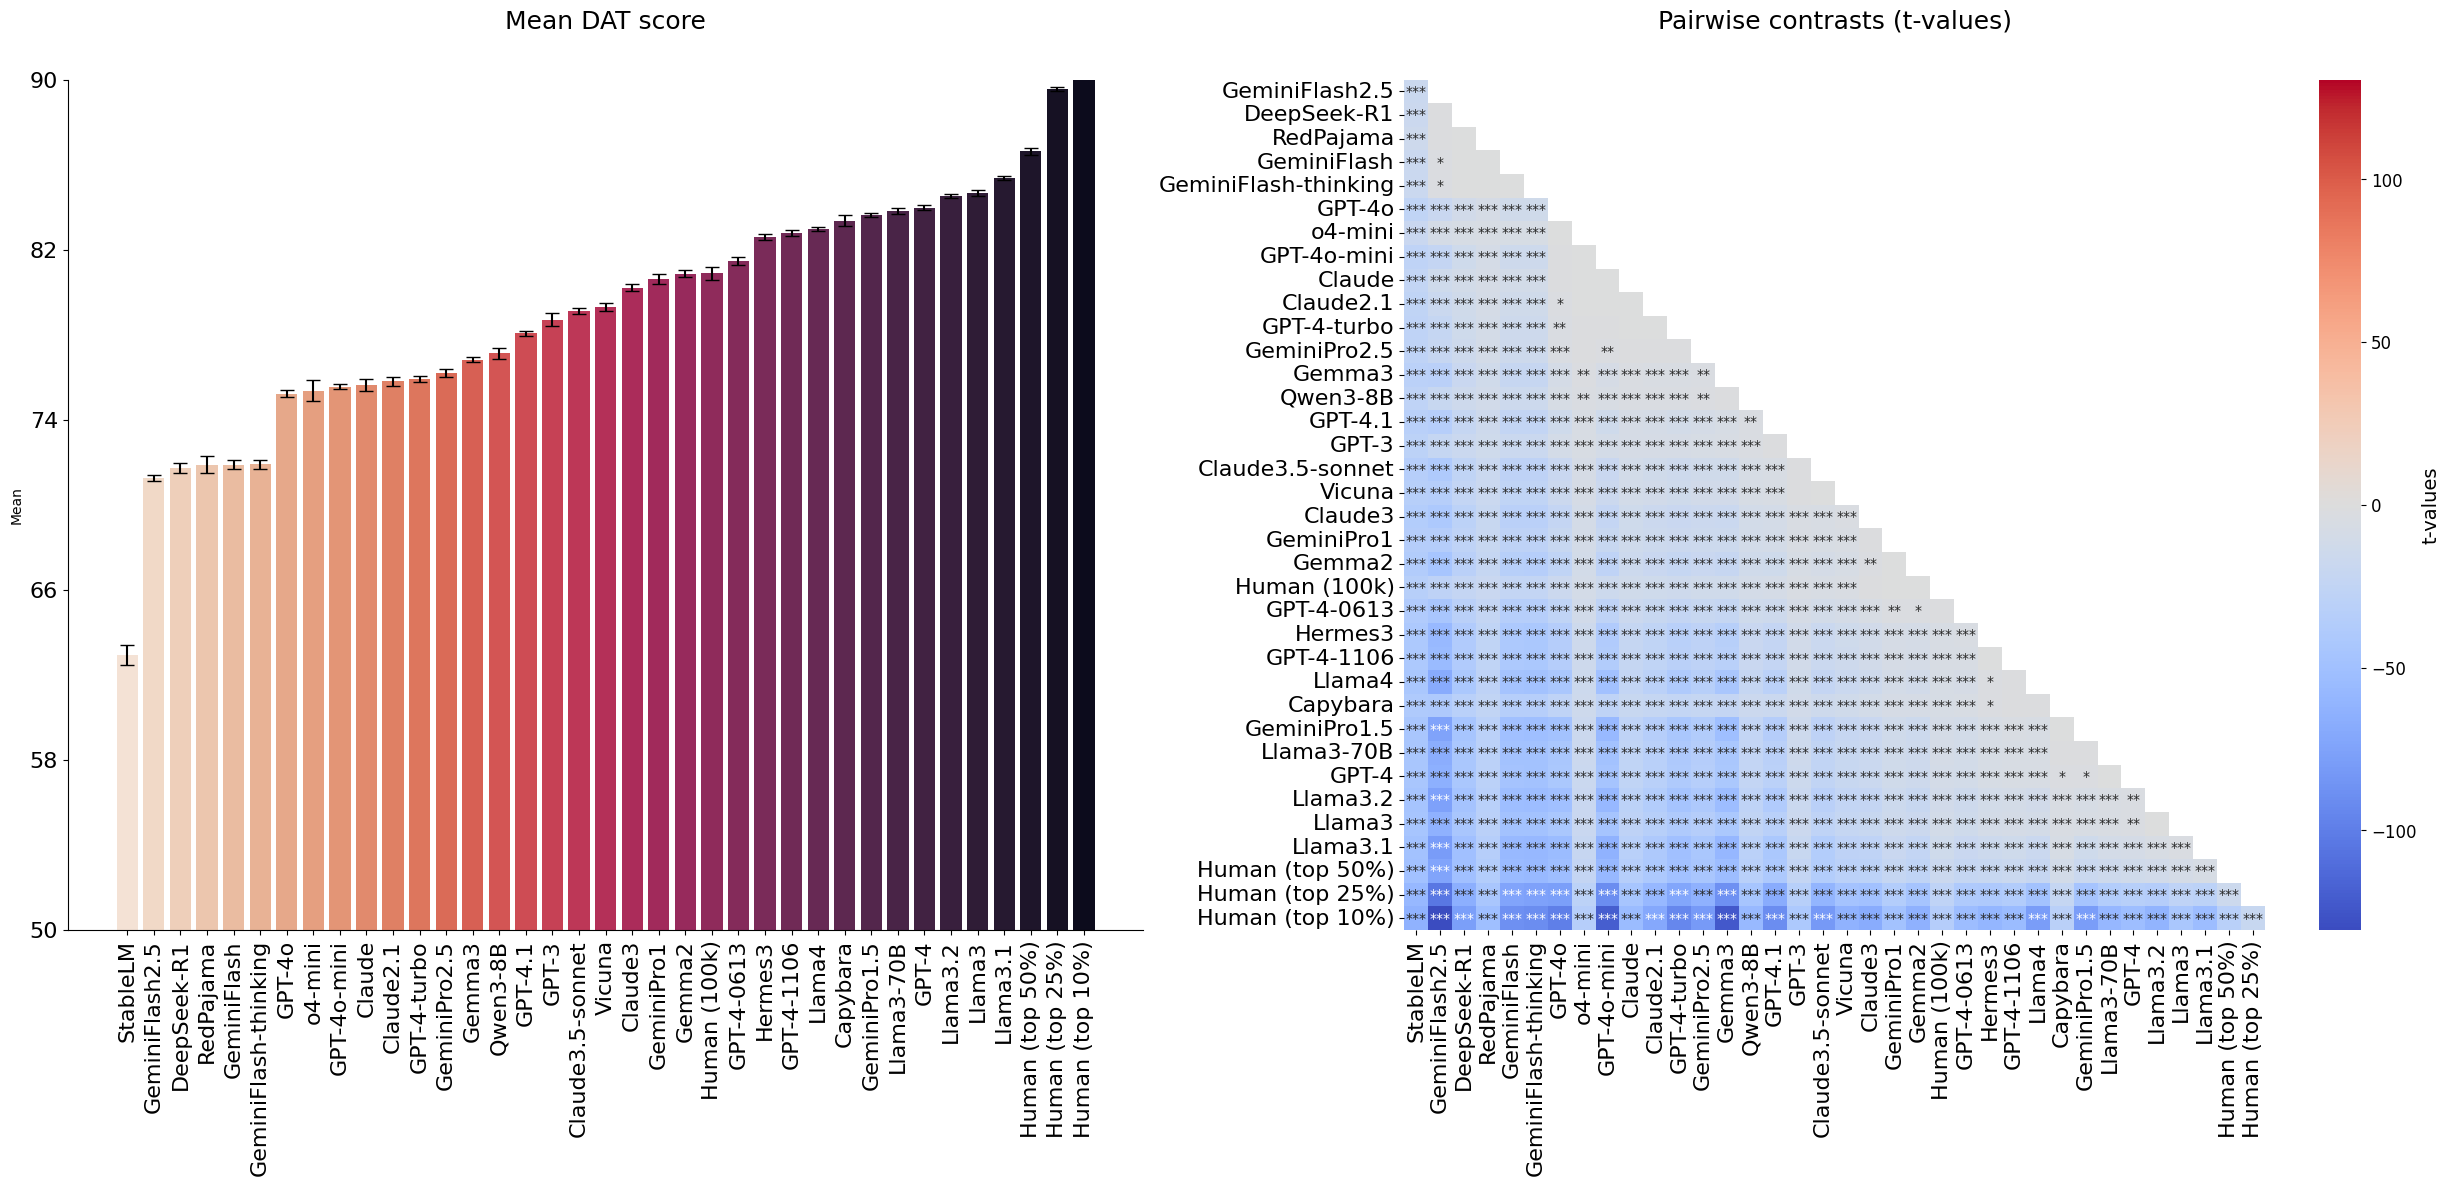

In [7]:
# Initialize the FacetGrid object
df = results_df.loc[(results_df['Strategy']=='Original instructions') &
                    (results_df['Temperature']=='Mid') | (results_df['Temperature'].isnull())]
# Isolate humans
human_df = df[df['Model'] == 'Human (100k)'].copy()
# remove outliers from the rest
df = df.groupby('Model').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
# subsample 500 per models
df = df.groupby('Model').apply(lambda x: x.sample(min(len(x), 500), random_state=42)).reset_index(drop=True)



def create_human_subgroup(source_df, percentile, new_model_name, n_samples=500):
    score_threshold = source_df['Score'].quantile(1 - percentile)
    top_performers = source_df[source_df['Score'] >= score_threshold].copy()
    subsampled_group = top_performers.sample(n=min(len(top_performers), n_samples), random_state=32)
    subsampled_group['Model'] = new_model_name
    return subsampled_group

human_top_10_percent = create_human_subgroup(human_df, 0.10, 'Human (top 10%)')
human_top_25_percent = create_human_subgroup(human_df, 0.25, 'Human (top 25%)')
human_top_50_percent = create_human_subgroup(human_df, 0.50, 'Human (top 50%)')

# concatenate
df = pd.concat([human_top_10_percent, human_top_25_percent, human_top_50_percent, df], ignore_index=True)

models = df['Model'].unique()
pal = sns.color_palette("rocket_r", len(models))
order = df.groupby('Model')['Score'].mean().dropna().sort_values(ascending=True).index


g = sns.FacetGrid(df, row="Model", hue="Model", aspect=9, height=1, row_order=order, palette=pal, hue_order=order)

# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "Score")
mean_conf, pvals, tvals, cohensd = analyze_results(df, 'Model', order)
# Add vertical lines for mean and confidence intervals
for ax, model in zip(g.axes.flat, order):
    ax.axvline(mean_conf[mean_conf['Model'] == model]['mean'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)

for ax in g.axes.flat:
    ax.set_xlabel('Creativity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.7)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xlim=(20, 100))
g.savefig('figures/DAT_LLMs_humans_ridge_mean_all_models', dpi=300)
create_heatmap(mean_conf, 'Model', tvals_table=tvals, pvals_table=pvals,
               pal=pal, order=order, only_stars=True, xlim=(50,90), save='figures/DAT_GPT_humans_models_all_models', large=(25, 12))


In [69]:
order = df.groupby('Model')['Score'].mean().dropna().sort_values(ascending=True).index

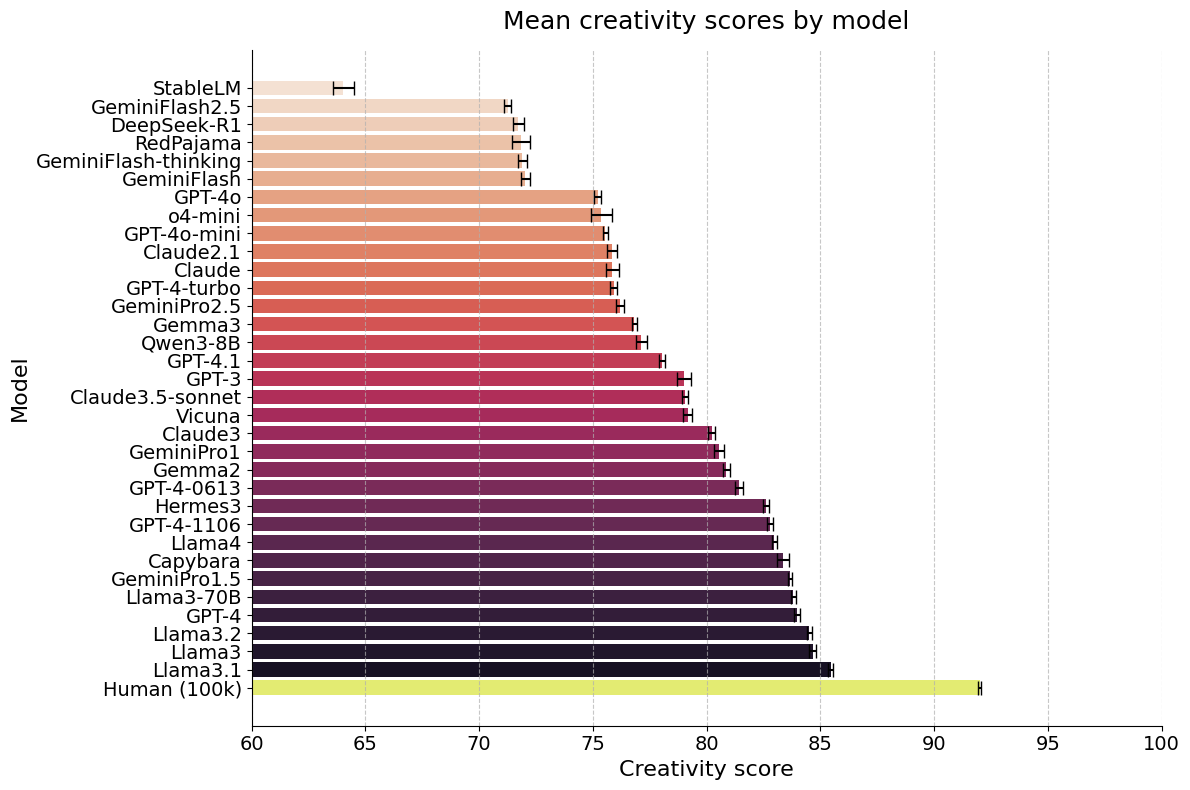

In [ ]:
# Create figure
plt.figure(figsize=(12, 8))

# Create a palette for the plot
pal = sns.color_palette('rocket_r', n_colors=len(order))
for i, model in enumerate(order):
    if model == 'Human (100k)':
        pal[i] = "#F4FF5E"  # Distinctive gray color for humans  # Use model-specific color from colors dict

# Create bar plot
g = sns.barplot(data=mean_conf, x='mean', y='Model', 
                palette=pal, order=order, orient='h',
                errorbar='se',  # Show standard error
                capsize=5)  # Add caps to error bars

# Add error bars manually to show standard error
for i, model in enumerate(order):
    model_data = mean_conf[mean_conf['Model'] == model]
    error = model_data['sem'].values[0]
    plt.errorbar(
        x=model_data['mean'].values[0],
        y=i,  # Because the plot is horizontal
        xerr=error,
        fmt='none',
        color='black',
        capsize=5
    )

# Customize appearance
plt.xlim(60, 100)  # Keep the same x-limits as original
sns.despine()  # Remove top and right spines

# Customize labels and title
plt.xlabel('Creativity score', fontsize=16)
plt.ylabel('Model', fontsize=16)
plt.title('Mean creativity scores by model', fontsize=18, pad=15)

# Customize tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('figures/mean_creativity_scores.png', dpi=300, bbox_inches='tight')


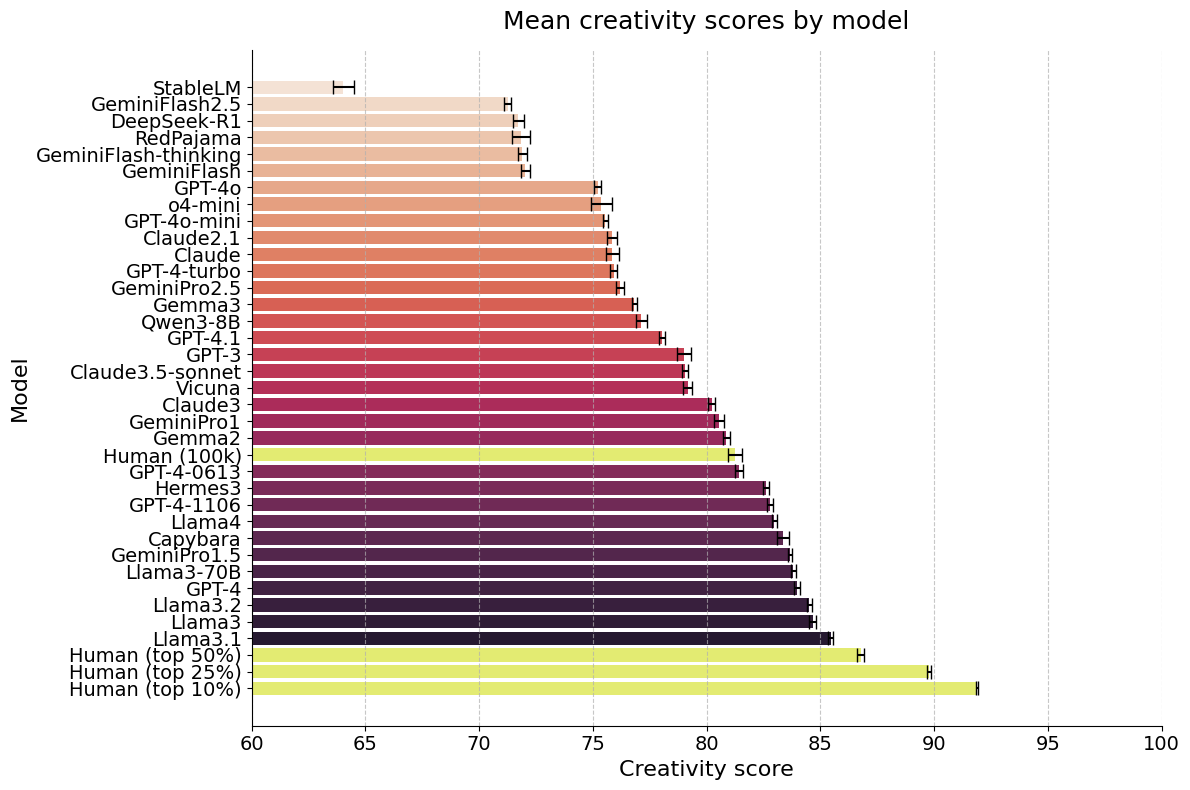

In [ ]:
df = results_df.loc[(results_df['Strategy']=='Original instructions') &
                    ((results_df['Temperature']=='Mid') | (results_df['Temperature'].isnull()))]

# Remove outliers (3 standard deviations from the mean for each model group)
df_no_outliers = df.groupby('Model').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)

# --- Data Transformation: Create Human Subgroups ---

# Isolate the original 'Human (100k)' data
human_df = df_no_outliers[df_no_outliers['Model'] == 'Human (100k)'].copy()

# Function to create a subsampled group from the top percentile of human scores
def create_human_subgroup(source_df, percentile, new_model_name, n_samples=500):
    """
    Creates a new DataFrame for a human subgroup based on a score percentile.
    
    Args:
        source_df (pd.DataFrame): The DataFrame containing all human scores.
        percentile (float): The percentile to use as the lower bound (e.g., 0.10 for top 10%).
        new_model_name (str): The new name for the 'Model' in the created subgroup.
        n_samples (int): The number of samples to randomly draw from the top group.
        

    Returns:
        pd.DataFrame: A new DataFrame representing the subsampled subgroup.
    """
    # Calculate the score threshold for the top percentile
    score_threshold = source_df['Score'].quantile(1 - percentile)
    
    # Filter for scores at or above the threshold
    top_performers = source_df[source_df['Score'] >= score_threshold].copy()
    
    # Take a random sample from this top-performing group
    subsampled_group = top_performers.sample(n=min(len(top_performers), n_samples), random_state=32)
    
    # Assign the new, descriptive model name
    subsampled_group['Model'] = new_model_name
    
    return subsampled_group

# Create the three specified human subgroups
human_top_10_percent = create_human_subgroup(human_df, 0.10, 'Human (top 10%)')
human_top_25_percent = create_human_subgroup(human_df, 0.25, 'Human (top 25%)')
human_top_50_percent = create_human_subgroup(human_df, 0.50, 'Human (top 50%)')

# Subsample the other AI models to ensure comparable sample sizes
other_models_sampled = df_no_outliers.groupby('Model', group_keys=False).apply(
    lambda g: g.sample(n=min(len(g), 500), random_state=32)
)

# Combine the AI models with the new human subgroups into a final DataFrame for plotting
final_df = pd.concat([other_models_sampled, human_top_10_percent, human_top_25_percent, human_top_50_percent], ignore_index=True)


# --- Plotting Section ---

# Calculate mean and standard error of the mean (sem) for plotting
plot_data = final_df.groupby('Model')['Score'].agg(['mean', 'sem']).reset_index()

# Determine the plot order based on the mean scores
plot_order = plot_data.sort_values('mean', ascending=True)['Model'].tolist()

# Create the figure
plt.figure(figsize=(12, 8))

# Define a color palette, ensuring human categories have a distinct color
human_color = "#F4FF5E"
palette = {model: human_color if 'Human' in model else color 
           for model, color in zip(plot_order, sns.color_palette('rocket_r', n_colors=len(plot_order)))}

# Create the main bar plot
sns.barplot(
    data=plot_data,
    x='mean',
    y='Model',
    order=plot_order,
    palette=palette,
    orient='h'
)

# Add error bars using the pre-calculated standard error
# We iterate through the ordered models to ensure error bars match the bars
y_ticks_positions = {model: i for i, model in enumerate(plot_order)}
for _, row in plot_data.iterrows():
    plt.errorbar(
        x=[row['mean']],
        y=[y_ticks_positions[row['Model']]],
        xerr=row['sem'],
        fmt='none',      # No line connecting points
        color='black',
        capsize=5
    )

# --- Customize and Finalize Plot ---

# Set plot limits and remove unnecessary chart lines
plt.xlim(60, 100)
sns.despine()

# Set labels and title with appropriate font sizes
plt.xlabel('Creativity score', fontsize=16)
plt.ylabel('Model', fontsize=16)
plt.title('Mean creativity scores by model', fontsize=18, pad=15)

# Customize tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Save the figure to a file
plt.savefig('mean_creativity_scores_by_model.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

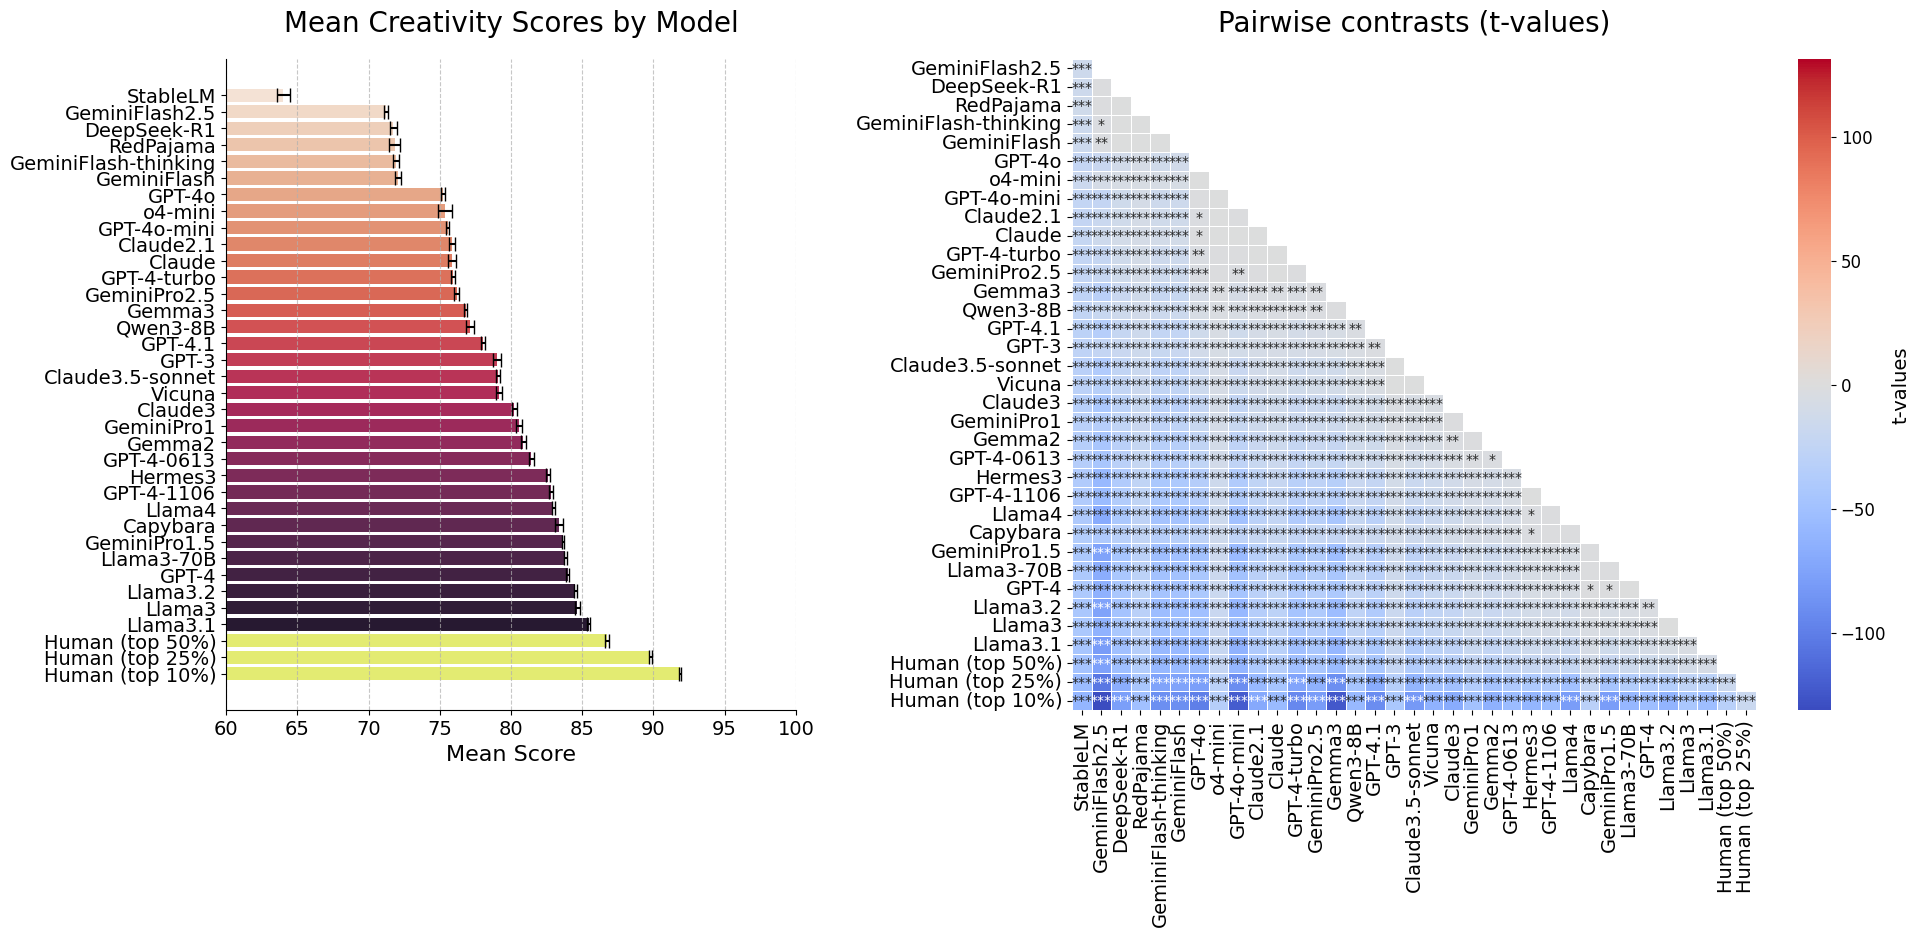

In [15]:
from itertools import combinations
from scipy.stats import ttest_ind



# --- Helper Function for Cohen's d ---
def cohen_d(d1, d2):
    """Calculate Cohen's d for independent samples."""
    # Correct for potential zero-length inputs
    if len(d1) < 2 or len(d2) < 2:
        return 0
    n1, n2 = len(d1), len(d2)
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # Return 0 if variance is zero to avoid division by zero errors
    if s1 == 0 or s2 == 0:
        return 0
    pooled_std = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    if pooled_std == 0:
        return 0
    mean_diff = np.mean(d1) - np.mean(d2)
    d = mean_diff / pooled_std
    return d

# --- Main Plotting Function (Revised for Readability) ---
def create_heatmap(
    mean_conf,
    variable,
    tvals_table,
    pvals_table,
    cohen_d_table=None,
    heatmap_type='t-values',  # Options: 't-values' or 'cohen-d'
    pal=None,
    order=None,
    color_order=None,
    xlim=(60, 100),
    save=None,
    large=(20, 10), # Increased figure size for better spacing
    rotation=90,
    axis_name='Mean Score',
    title_name='Mean Creativity Score',
):
    """
    Generates a figure with a horizontal bar plot and a heatmap for improved readability.
    """
    # Generate a mask for the upper triangle of the heatmap
    mask = np.triu(np.ones_like(tvals_table, dtype=bool))

    # Set up the matplotlib figure
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=large, gridspec_kw={'width_ratios': [1, 1.5]})

    if color_order is not None and order is not None:
        pal = dict(zip(order, color_order))

    # --- Horizontal Bar Plot (Left Subplot) ---
    bar_plot = sns.barplot(
        x="mean",
        y=variable,
        data=mean_conf,
        ax=axs[0],
        palette=pal,
        order=order,
        orient='h',
        errorbar=None,
    )
    
    # Add error bars to the horizontal plot
    for i, model in enumerate(order):
        model_data = mean_conf[mean_conf[variable] == model]
        if not model_data.empty:
            mean_val = model_data["mean"].values[0]
            error = model_data["sem"].values[0]
            axs[0].errorbar(
                x=[mean_val],
                y=[i],
                xerr=error,
                fmt="none",
                color="black",
                capsize=5,
            )

    axs[0].set_ylabel("") # Model names are on the y-axis ticks
    axs[0].set_xlabel(axis_name, fontsize=16)
    axs[0].set_title(title_name, fontsize=20, pad=20)
    axs[0].set_xlim(xlim)
    axs[0].tick_params(axis='x', labelsize=14)
    axs[0].tick_params(axis='y', labelsize=14)
    sns.despine(ax=axs[0])
    axs[0].grid(axis='x', linestyle='--', alpha=0.7)


    # --- Heatmap (Right Subplot) ---
    if heatmap_type == 'cohen-d' and cohen_d_table is not None:
        heatmap_data = cohen_d_table
        cmap = "Purples"
        cbar_label = "Cohen's d"
        vmin, vmax = 0, heatmap_data.abs().max().max()
    else:
        heatmap_data = tvals_table
        cmap = "coolwarm"
        cbar_label = "t-values"
        vmax = heatmap_data.abs().max().max()
        vmin = -vmax

    # Prepare heatmap annotations (stars only)
    mask = mask[1:, :-1]
    heatmap_data_subset = heatmap_data.iloc[1:, :-1]
    pval_stars = pvals_table.iloc[1:, :-1].applymap(
        lambda x: "***" if x < 0.001 else "**" if x < 0.01 else "*" if x < 0.05 else ""
    )
    
    sns.heatmap(
        heatmap_data_subset,
        mask=mask,
        annot=pval_stars, # Use stars for annotations
        fmt="",
        cmap=cmap,
        cbar_kws={"label": cbar_label},
        ax=axs[1],
        vmin=vmin,
        vmax=vmax,
        linewidths=.5
    )

    axs[1].tick_params(axis='x', labelsize=14, rotation=rotation)
    axs[1].tick_params(axis='y', labelsize=14, rotation=0)
    axs[1].set_title(f"Pairwise contrasts ({heatmap_type})", fontsize=20, pad=20)
    colorbar = axs[1].collections[0].colorbar
    colorbar.ax.tick_params(labelsize=12)
    colorbar.set_label(cbar_label, fontsize=14)
    axs[1].set_xlabel("")
    axs[1].set_ylabel("")

    plt.tight_layout(pad=3.0)
    if save is not None:
        plt.savefig(f"{save}.png", dpi=300, bbox_inches='tight')
    plt.show()

# --- Data Filtering and Preparation ---
df = results_df.loc[(results_df['Strategy']=='Original instructions') &
                    ((results_df['Temperature']=='Mid') | (results_df['Temperature'].isnull()))]
df_no_outliers = df.groupby('Model').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)

# --- Data Transformation: Create Human Subgroups ---
human_df = df_no_outliers[df_no_outliers['Model'] == 'Human (100k)'].copy()
def create_human_subgroup(source_df, percentile, new_model_name, n_samples=500):
    score_threshold = source_df['Score'].quantile(1 - percentile)
    top_performers = source_df[source_df['Score'] >= score_threshold].copy()
    subsampled_group = top_performers.sample(n=min(len(top_performers), n_samples), random_state=32)
    subsampled_group['Model'] = new_model_name
    return subsampled_group

human_top_10_percent = create_human_subgroup(human_df, 0.10, 'Human (top 10%)')
human_top_25_percent = create_human_subgroup(human_df, 0.25, 'Human (top 25%)')
human_top_50_percent = create_human_subgroup(human_df, 0.50, 'Human (top 50%)')
other_models_sampled = df_no_outliers[df_no_outliers['Model'] != 'Human (100k)'].groupby('Model', group_keys=False).apply(lambda g: g.sample(n=min(len(g), 500), random_state=32))
final_df = pd.concat([other_models_sampled, human_top_10_percent, human_top_25_percent, human_top_50_percent], ignore_index=True)

# --- Data Aggregation and Pairwise Comparisons ---
plot_data = final_df.groupby('Model')['Score'].agg(['mean', 'sem']).reset_index()
plot_order = plot_data.sort_values('mean', ascending=True)['Model'].tolist() # Order descending for horizontal plot

# Initialize tables for storing comparison results
tvals_table = pd.DataFrame(index=plot_order, columns=plot_order, dtype=float)
pvals_table = pd.DataFrame(index=plot_order, columns=plot_order, dtype=float)
cohen_d_table = pd.DataFrame(index=plot_order, columns=plot_order, dtype=float)

# Perform pairwise comparisons
for model1, model2 in combinations(plot_order, 2):
    scores1 = final_df[final_df['Model'] == model1]['Score']
    scores2 = final_df[final_df['Model'] == model2]['Score']
    
    t_stat, p_val = ttest_ind(scores1, scores2, equal_var=False, nan_policy='omit')
    tvals_table.loc[model1, model2] = tvals_table.loc[model2, model1] = t_stat
    pvals_table.loc[model1, model2] = pvals_table.loc[model2, model1] = p_val
    
    d = cohen_d(scores1, scores2)
    cohen_d_table.loc[model1, model2] = cohen_d_table.loc[model2, model1] = d

# Define color palette
human_color = "#F4FF5E"
palette = {model: human_color if 'Human' in model else color 
           for model, color in zip(plot_order, sns.color_palette('rocket_r', n_colors=len(plot_order)))}

# --- Generate Plots using the revised function ---
# Plot with t-values
create_heatmap(
    mean_conf=plot_data,
    variable='Model',
    tvals_table=tvals_table,
    pvals_table=pvals_table,
    pal=palette,
    order=plot_order,
    heatmap_type='t-values',
    save='creativity_plot_t_values_readable',
    title_name='Mean Creativity Scores by Model'
)


## Reasoning Models

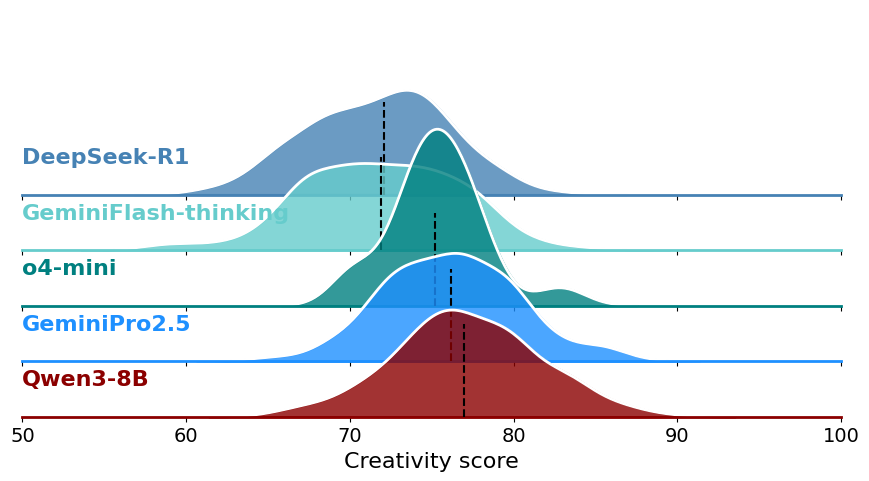

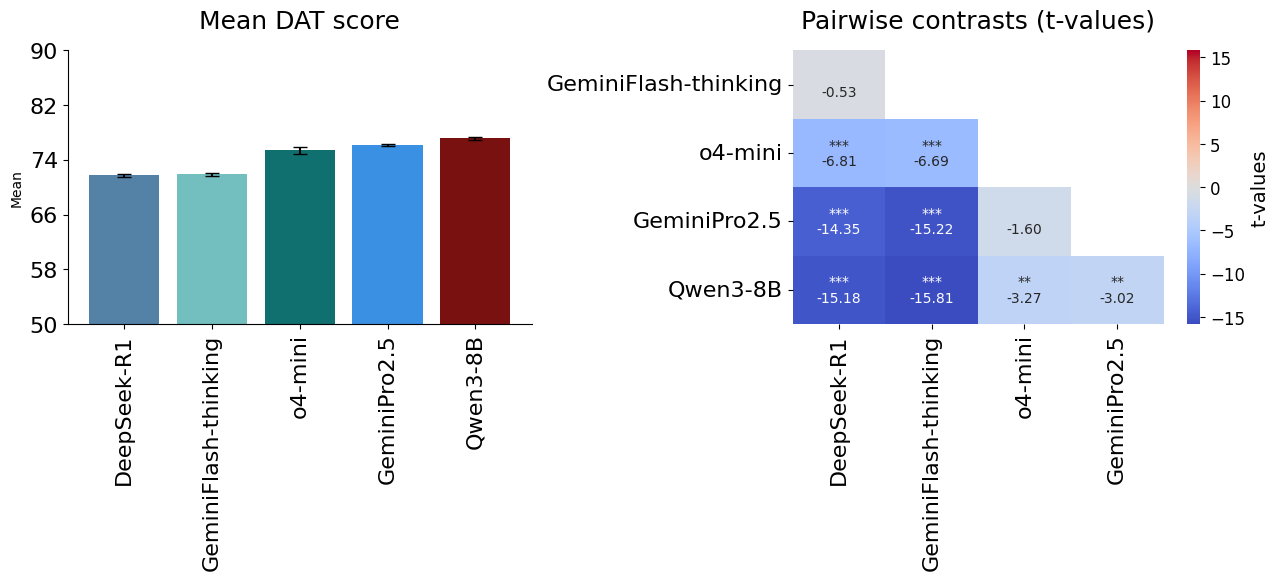

In [46]:
# Initialize the FacetGrid object
pal = [
    colors['Qwen3-8B_mid_DAT'] if 'Qwen3-8B_mid_DAT' in colors else '#8B0000', 
    colors['GeminiPro2.5_mid_DAT'],
    colors['o4-mini_mid_DAT'],
    colors['GeminiFlash-thinking_mid_DAT'] if 'GeminiFlash-thinking_mid_DAT' in colors else '#66CCCC',
    colors['DeepSeek-R1_mid_DAT'] if 'DeepSeek-R1_mid_DAT' in colors else '#4682B4'
]

# Inverse the order
pal.reverse()

df = results_df.loc[(results_df['Strategy']=='Original instructions') &
              (results_df['Temperature']=='Mid')]

models = ['Qwen3-8B', 'GeminiPro2.5', 'o4-mini', 'GeminiFlash-thinking', 'DeepSeek-R1']

df = df[df['Model'].isin(models)]
order = df.groupby('Model')['Score'].mean().sort_values(ascending=True).index

# Filter outliers and sample data
df = df.groupby('Model').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
df = df.groupby('Model').apply(lambda x: x.sample(min(len(x), 500), random_state=32)).reset_index(drop=True)

g = sns.FacetGrid(df, row="Model", hue="Model", aspect=9, height=1, row_order=order, palette=pal, hue_order=order)

# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
    
# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "Score")

mean_conf, pvals, tvals, cohensd = analyze_results(df, 'Model', order)
# Add vertical lines for mean and confidence intervals
for ax, model in zip(g.axes.flat, order):
    ax.axvline(mean_conf[mean_conf['Model'] == model]['median'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)

for ax in g.axes.flat:
    ax.set_xlabel('Creativity score', fontsize=16)
    for label in ax.get_xticklabels():
         label.set_fontsize(14)
         
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.7)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xlim=(50, 100))

# Save the figure
g.savefig('figures/DAT_reasoning_models_ridge', dpi=300)

# Create heatmap for statistical comparison
create_heatmap(mean_conf, 'Model', tvals_table=tvals, pvals_table=pvals,
         pal=pal, order=order, xlim=(50,90), save='figures/DAT_reasoning_models_stats', large=(13, 6))

## Divergent Association Scores against Control
Control condition is : "Make a list of 10 words"

In [ ]:
#from multiple_test import *
list_of_dfs = [results_df.loc[(results_df['Model']=='GPT-3') &
                              (results_df['Temperature']=='Mid')],
               results_df.loc[(results_df['Model']=='GPT-4') &
                              (results_df['Temperature']=='Mid') &
                              (results_df['Control']!='Strategy')],
               results_df.loc[(results_df['Model']=='GPT-4-turbo') &
                              (results_df['Temperature']=='Mid') &
                              (results_df['Control']!='Strategy')],
               results_df.loc[(results_df['Model']=='Claude3') &
                              (results_df['Temperature']=='Mid') &
                              (results_df['Control']!='Strategy')],
               results_df.loc[(results_df['Model']=='GeminiPro1') &
                              (results_df['Temperature']=='Mid') &
                              (results_df['Control']!='Strategy')],
               results_df.loc[(results_df['Model']=='Vicuna') &
                               (results_df['Temperature']=='Mid') &
                              (results_df['Control']!='Strategy')],]

for e, df in enumerate(list_of_dfs):
      gpt = df["Model"].unique()[0]
      # Remove observations with more or less than 3 std, and then randomly sample up to 500 observations
      df['Control'] = df['Control'].replace({'Original instructions': 'DAT'})
      df = df.groupby('Control').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
      df = df.groupby('Control').apply(lambda x: x.sample(min(len(x), 500), random_state=42)).reset_index(drop=True)
            

      # Initialize the FacetGrid object
      pal = [colors[f'{gpt}_mid_DAT'], colors[f'{gpt}_mid_control']]
      order = ['Control', 'DAT']


      g = sns.FacetGrid(df, row="Control", hue="Control", aspect=9, height=1, palette=[pal[1], pal[0]], row_order=order)
      # set figure size
      g.fig.set_size_inches(8, 3)
      
      # make transparent background
      for ax in g.axes.flat:
            ax.set_facecolor('none')
      # Draw the densities in a few steps
      g.map(sns.kdeplot, "Score",
            bw_adjust=1, clip_on=False,
            fill=True, alpha=1, linewidth=1.5)
      g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

      # passing color=None to refline() uses the hue mapping
      g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
      # Define and use a simple function to label the plot in axes coordinates
      def label(x, color, label):
            ax = plt.gca()
            txt = f"{label}"
            ax.text(0, .2, txt, fontweight="bold", color=color,
                        ha="left", va="center", transform=ax.transAxes,fontsize=16)
      # change title from the FaceGrid object
      #g.set_titles("Stable LM")
      g.map(label, "Score")
      # increase title size
      g.set_titles(fontsize=16)
      mean_conf, pvals, tvals = analyze_results(df, 'Control', order=order)
      #print(mean_conf)
      # Add vertical lines for mean and confidence intervals
      for ax, model in zip(g.axes.flat, [0,1]):
            ax.axvline(mean_conf['median'][model], color='black', linestyle='--', ymin=0, ymax=0.5)
      # Set the subplots to overlap
      for ax in g.axes.flat:
            ax.set_xlabel('Creativity score', fontsize=16)
            for label in ax.get_xticklabels():
                  label.set_fontsize(14)
      g.figure.subplots_adjust(hspace=-.50)

      # Remove axes details that don't play well with overlap
      g.set_titles("")
      # set the main title of the figure
      
      g.set(yticks=[], ylabel="")
      g.despine(bottom=True, left=True)
      g.set(xlim=(20, 100))
      g.fig.suptitle(df['Model'].unique()[0], fontsize=16)
      g.fig.suptitle(gpt, fontsize=16)
      g.savefig('figures/DAT_GPT_control_kde_{}'.format(str(e)), dpi=300)
      create_heatmap(mean_conf, 'Control', tvals_table=tvals, pvals_table=pvals, pal=reversed(pal), order=['Control', 'DAT'], 
                     save='figures/DAT_GPT_control{}'.format(str(e)), large=(9, 4), xlim=(50,90), rotation=45, axis_name='Creativity score')

## Divergent Association Scores per strategies

In [ ]:
def get_palette(model, order):
    color_map = {
        'GPT-3': {
            'Etymology': colors['GPT-3_mid_ety'],
            'DAT': colors['GPT-3_mid_DAT'],
            'Control': colors['GPT-3_mid_control'],
            'Opposition': colors['GPT-3_mid_opp'],
            'Thesaurus': colors['GPT-3_mid_thes']
        },
        'GPT-4': {
            'Etymology': colors['GPT-4_mid_ety'],
            'Control': colors['GPT-4_mid_control'],
            'DAT': colors['GPT-4_mid_DAT'],
            'Opposition': colors['GPT-4_mid_opp'],
            'Thesaurus': colors['GPT-4_mid_thes']
        },
        'GeminiPro1': {
            'Etymology': colors['GeminiPro1_mid_ety'],
            'Control': colors['GeminiPro1_mid_control'],
            'DAT': colors['GeminiPro1_mid_DAT'],
            'Opposition': colors['GeminiPro1_mid_opp'],
            'Thesaurus': colors['GeminiPro1_mid_thes']
        },
        'Llama3.1': {
            'Etymology': colors['Llama3.1_mid_ety'],
            'Control': colors['Llama3.1_mid_control'],
            'DAT': colors['Llama3.1_mid_DAT'],
            'Opposition': colors['Llama3.1_mid_opp'],
            'Thesaurus': colors['Llama3.1_mid_thes']
        },
    }

    return [color_map[model][strategy] for strategy in order]


### Plot Strategies for GPT-3

In [ ]:
gpt = "GPT-3"

df = results_df.loc[(results_df['Model'] == gpt) & (results_df['Temperature'] == 'Mid')]
df['Strategy'] = df['Strategy'].replace({'Original instructions': 'DAT'})
df = df.groupby('Strategy').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
df = df.groupby('Strategy').apply(lambda x: x.sample(min(len(x), 500), random_state=42)).reset_index(drop=True)
df = df[df['Strategy'] != 'Random']
# change strategy DAT for Basic Instructions

order = df.groupby('Strategy')['Score'].mean().sort_values(ascending=True).index
pal_order = get_palette(gpt, order)
df['Strategy'] = df['Strategy'].replace({'DAT': 'Basic instructions'})
order = df.groupby('Strategy')['Score'].mean().sort_values(ascending=True).index


# Initialize the FacetGrid gpt
g = sns.FacetGrid(df,row="Strategy", hue="Strategy", aspect=9,
                  height=1,row_order=order, palette=pal_order, hue_order=order)
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, f"{label}", fontweight="bold", color=color,
                  ha="left", va="center", transform=ax.transAxes, fontsize=16)
g.map(label, "Score")

df['Strategy'] = df['Strategy'].replace({'Basic instructions': 'Basic inst.'})
# replace Basic instructions with Basic inst. in order list
order = [x if x != 'Basic instructions' else 'Basic inst.' for x in order]

# Add vertical lines for mean and confidence intervals
mean_conf, pvals, tvals = analyze_results(df, 'Strategy', order=order)
for ax, model in zip(g.axes.flat, order):
      ax.axvline(mean_conf[mean_conf['Strategy'] == model]['median'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)
for ax in g.axes.flat:
    ax.set_xlabel('Creativity score', fontsize=16)
    for label in ax.get_xticklabels():
        label.set_fontsize(16)
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.32)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xlim=(35, 100))
g.despine(bottom=True, left=True)
g.savefig('figures/GPT3_strategy_final_kde.png', dpi=300)

create_heatmap(mean_conf, 'Strategy', tvals_table=tvals,
            pvals_table=pvals, order=order, pal=pal_order, color_order=pal_order, large=(10.5, 5), xlim=(50, 90),
            save='figures/GPT3_final', rotation=45, title_name='Performance by strategy', axis_name='Creativity score')


## Plot strategies for GPT-4

In [ ]:
gpt = "GPT-4"


df = results_df.loc[(results_df['Model'] == gpt) & (results_df['Temperature'] == 'Mid')]
df['Strategy'] = df['Strategy'].replace({'Original instructions': 'DAT'})
df = df.groupby('Strategy').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
df = df.groupby('Strategy').apply(lambda x: x.sample(min(len(x), 500), random_state=42)).reset_index(drop=True)
df = df[df['Strategy'] != 'Random']
# change strategy DAT for Basic Instructions

order = df.groupby('Strategy')['Score'].mean().sort_values(ascending=True).index
pal_order = get_palette(gpt, order)
df['Strategy'] = df['Strategy'].replace({'DAT': 'Basic instructions'})
order = df.groupby('Strategy')['Score'].mean().sort_values(ascending=True).index

# Initialize the FacetGrid gpt
g = sns.FacetGrid(df,row="Strategy", hue="Strategy", aspect=9,
                  height=1, palette=pal_order, row_order=order, hue_order=order)
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=.6, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# f"{label} ({len(df.loc[df['Strategy']==label])})"
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, f"{label}", fontweight="bold", color=color,
                  ha="left", va="center", transform=ax.transAxes, fontsize=16)
g.map(label, "Score")
df['Strategy'] = df['Strategy'].replace({'Basic instructions': 'Basic inst.'})
# replace Basic instructions with Basic inst. in order list
order = [x if x != 'Basic instructions' else 'Basic inst.' for x in order]
mean_conf, pvals, tvals = analyze_results(df, 'Strategy', order=order)
for ax, model in zip(g.axes.flat, order):
      ax.axvline(mean_conf[mean_conf['Strategy'] == model]['median'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.32)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xlim=(35, 100))

for ax in g.axes.flat:
    ax.set_xlabel('Creativity score', fontsize=16)
    for label in ax.get_xticklabels():
        label.set_fontsize(16)

g.despine(bottom=True, left=True)

g.savefig('figures/GPT4_strategy_kde_final.png', dpi=300)
create_heatmap(mean_conf, 'Strategy', tvals_table=tvals,
            pvals_table=pvals, order=order, pal=pal_order, color_order=pal_order, large=(10.5, 5), xlim=(50, 90),
            save='figures/GPT4_strategy_final2.png', rotation=45, title_name='Performance by strategy', axis_name='Creativity score')


### Plot strategies for Gemini Pro 1

In [ ]:
gpt = "GeminiPro1"


df = results_df.loc[(results_df['Model'] == gpt) & (results_df['Temperature'] == 'Mid')]
df['Strategy'] = df['Strategy'].replace({'Original instructions': 'DAT'})
df = df.groupby('Strategy').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
df = df.groupby('Strategy').apply(lambda x: x.sample(min(len(x), 500), random_state=42)).reset_index(drop=True)

# change strategy DAT for Basic Instructions

order = df.groupby('Strategy')['Score'].mean().sort_values(ascending=True).index
pal_order = get_palette(gpt, order)
df['Strategy'] = df['Strategy'].replace({'DAT': 'Basic instructions'})
order = df.groupby('Strategy')['Score'].mean().sort_values(ascending=True).index

# Initialize the FacetGrid gpt
g = sns.FacetGrid(df,row="Strategy", hue="Strategy", aspect=9,
                  height=1, palette=pal_order, row_order=order, hue_order=order)
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=.6, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# f"{label} ({len(df.loc[df['Strategy']==label])})"
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, f"{label}", fontweight="bold", color=color,
                  ha="left", va="center", transform=ax.transAxes, fontsize=16)
g.map(label, "Score")
df['Strategy'] = df['Strategy'].replace({'Basic instructions': 'Basic inst.'})
# replace Basic instructions with Basic inst. in order list
order = [x if x != 'Basic instructions' else 'Basic inst.' for x in order]
mean_conf, pvals, tvals = analyze_results(df, 'Strategy', order=order)
for ax, model in zip(g.axes.flat, order):
      ax.axvline(mean_conf[mean_conf['Strategy'] == model]['median'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.32)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xlim=(35, 100))

for ax in g.axes.flat:
    ax.set_xlabel('Creativity score', fontsize=16)
    for label in ax.get_xticklabels():
        label.set_fontsize(16)

g.despine(bottom=True, left=True)

g.savefig('figures/GeminiPro1_strategy_kde_final.png', dpi=300)
create_heatmap(mean_conf, 'Strategy', tvals_table=tvals,
            pvals_table=pvals, order=order, pal=pal_order, color_order=pal_order, large=(10.5, 5), xlim=(50, 90),
            save='figures/GeminiPro1_strategy_final.png', rotation=45, title_name='Performance by strategy', axis_name='Creativity score')

In [ ]:
gpt = "Llama3.1"

df = results_df.loc[(results_df['Model'] == gpt) & (results_df['Temperature'] == 'Mid')]
df['Strategy'] = df['Strategy'].replace({'Original instructions': 'DAT'})
df = df.groupby('Strategy').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
df = df.groupby('Strategy').apply(lambda x: x.sample(min(len(x), 500), random_state=42)).reset_index(drop=True)
df = df[df['Strategy'] != 'Random']
# change strategy DAT for Basic Instructions

order = df.groupby('Strategy')['Score'].mean().sort_values(ascending=True).index
pal_order = get_palette(gpt, order)
df['Strategy'] = df['Strategy'].replace({'DAT': 'Basic instructions'})
order = df.groupby('Strategy')['Score'].mean().sort_values(ascending=True).index


# Initialize the FacetGrid gpt
g = sns.FacetGrid(df,row="Strategy", hue="Strategy", aspect=9,
                  height=1,row_order=order, palette=pal_order, hue_order=order)
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=.6, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, f"{label}", fontweight="bold", color=color,
                  ha="left", va="center", transform=ax.transAxes, fontsize=16)
g.map(label, "Score")

df['Strategy'] = df['Strategy'].replace({'Basic instructions': 'Basic inst.'})
# replace Basic instructions with Basic inst. in order list
order = [x if x != 'Basic instructions' else 'Basic inst.' for x in order]

# Add vertical lines for mean and confidence intervals
mean_conf, pvals, tvals = analyze_results(df, 'Strategy', order=order)
for ax, model in zip(g.axes.flat, order):
      ax.axvline(mean_conf[mean_conf['Strategy'] == model]['median'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)
for ax in g.axes.flat:
    ax.set_xlabel('Creativity score', fontsize=16)
    for label in ax.get_xticklabels():
        label.set_fontsize(16)
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.6)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xlim=(50, 100))
g.despine(bottom=True, left=True)
g.savefig('figures/Llama3.1_strategy_final_kde.png', dpi=300)

create_heatmap(mean_conf, 'Strategy', tvals_table=tvals,
            pvals_table=pvals, order=order, pal=pal_order, color_order=pal_order, large=(10.5, 5), xlim=(50, 90),
            save='figures/Llama3.1_strategy_final', rotation=45, title_name='Performance by strategy', axis_name='Creativity score')


## Effect of temperature 

In [12]:
def normalize_filter_std_n(group):
    group_filtered = group[np.abs(group['Score'] - group['Score'].mean()) <= 3 * group['Score'].std()]
    return group_filtered.sample(min(len(group_filtered), 500), random_state=42)

ValueError: `data` and `annot` must have same shape.

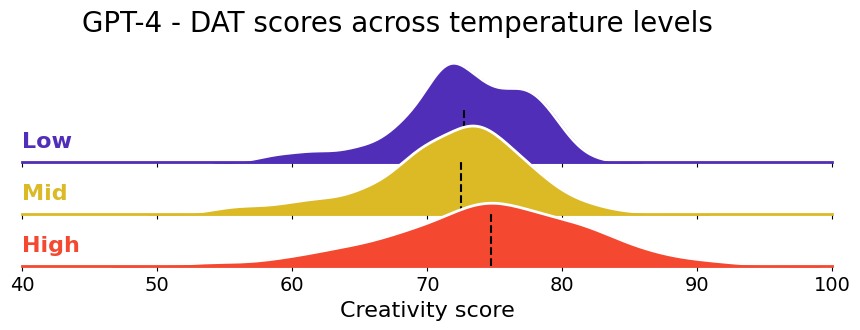

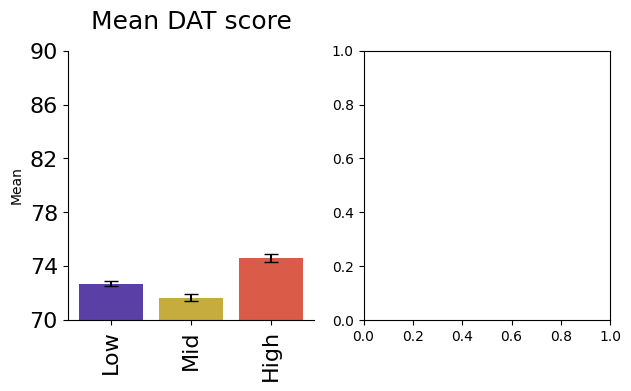

In [14]:
list_of_dfs = [results_df.loc[(results_df['Model']=='GPT-4') & 
                              (results_df['Control']=='Control')],
               results_df.loc[(results_df['Model']=='GPT-4') &
                              (results_df['Control']=='Original instructions')]]
conditions = ['Low', 'Mid', 'High']
list_of_dfs_normalized_filtered = [df.groupby('Temperature', as_index=False).apply(normalize_filter_std_n) for df in list_of_dfs]
for e, df in enumerate(list_of_dfs_normalized_filtered):
      # Initialize the FacetGrid object
      pal = sns.color_palette('CMRmap',n_colors=3, desat=.9)
      pal = [pal[0], pal[2], pal[1]]
      # keep color order consistent
      g = sns.FacetGrid(df, row="Temperature", hue="Temperature", aspect=9, height=1, palette=pal, row_order=conditions, hue_order=conditions)
      for ax in g.axes.flat:
            ax.set_facecolor('none')
      # increase size of condition names
      g.set_titles(fontsize=16)
      # Draw the densities in a few steps
      g.map(sns.kdeplot, "Score",
            bw_adjust=1, clip_on=False,
            fill=True, alpha=1, linewidth=1.5)
      g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

      # passing color=None to refline() uses the hue mapping
      g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

      def label(ax, color, label):
            txt = f"{label}"
            ax.text(0, .2, txt, fontweight="bold", color=color,
                        ha="left", va="center", transform=ax.transAxes,fontsize=16)

      # Set the subplots to overlap
      for ax, model, color in zip(g.axes.flat, ['Low', 'Mid', 'High'], [pal[0], pal[1], pal[2]]):
            ax.set_xlabel('Creativity score', fontsize=16)
            label(ax, color, model)
            for label in ax.get_xticklabels():
                  label.set_fontsize(14)
       # Add vertical lines for mean and confidence intervals
      mean_conf, pvals, tval, cohensd = analyze_results(df, 'Temperature', order=conditions)
      for ax, model in zip(g.axes.flat, ['Low', 'Mid', 'High']):
            ax.axvline(mean_conf[mean_conf['Temperature'] == model]['median'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)

      # Set the subplots to overlap
      g.figure.subplots_adjust(hspace=-.5)

      # Remove axes details that don't play well with overlap
      g.set_titles("")
      g.set(yticks=[], ylabel="")
      g.despine(bottom=True, left=True)
      g.set(xlim=(40, 100))
      
      # Set a title for the figure
      g.fig.suptitle(f"GPT-4 - {df['Control'].unique()[0]}", fontsize=20, y=1.05)
      g.fig.suptitle(f"GPT-4 - DAT scores across temperature levels", fontsize=20, y=1.05)
      
      g.savefig('figures/GPT4_DAT_temperature_kde{}.png'.format(e), dpi=300)
      create_heatmap(mean_conf, 'Temperature', tvals_table=tvals, pvals_table=pvals, pal=pal, order=['Low', 'Mid', 'High'],
                     save='figures/GPT4_DAT_temperature_{}.png'.format(e), large=(7, 3.5), xlim=(70, 90))

## Top words for specific temperature level

In [ ]:
modelname = 'GPT-4'
temp = 'Low'
strategy = 'Original instructions'
palette = sns.color_palette("Set2", 1)
n_words = 10

df = results_df.loc[(results_df['Model']==modelname) & (results_df['Strategy']==strategy ) &
                    ((results_df['Temperature']==temp))].dropna()

# Use ast.literal_eval to safely evaluate the string representation of a list into an actual list
all_words_lists = df['Words'].dropna()

# Now flatten the list of lists
all_words = [word for sublist in all_words_lists for word in sublist]

# Now create the bar plot
create_bar_plot(most_common_words(all_words, n_words), n_lists=len(all_words_lists), ylim=(0, 100), alpha=0.9, palette_name=palette,
                save=False, modelname=modelname, temp=temp, strategy=strategy, title='Low Temperature')

In [ ]:
modelname = 'GPT-4'
temp = 'Mid'
strategy = 'Original instructions'
palette = sns.color_palette("Set2", 1)
n_words = 10

df = results_df.loc[(results_df['Model']==modelname) & (results_df['Strategy']==strategy ) &
                    ((results_df['Temperature']==temp))].dropna()

# Use ast.literal_eval to safely evaluate the string representation of a list into an actual list
all_words_lists = df['Words'].dropna()

# Now flatten the list of lists
all_words = [word for sublist in all_words_lists for word in sublist]

# Now create the bar plot
create_bar_plot(most_common_words(all_words, n_words), n_lists=len(all_words_lists), ylim=(0, 100), alpha=0.9, palette_name=palette,
                save=False, modelname=modelname, temp=temp, strategy=strategy, title=f'{temp} Temperature')

In [ ]:
modelname = 'GPT-4'
temp = 'High'
strategy = 'Original instructions'
palette = sns.color_palette("Set2", 1)
n_words = 10

df = results_df.loc[(results_df['Model']==modelname) & (results_df['Strategy']==strategy ) &
                    ((results_df['Temperature']==temp))].dropna()

# Use ast.literal_eval to safely evaluate the string representation of a list into an actual list
all_words_lists = df['Words'].dropna()

# Now flatten the list of lists
all_words = [word for sublist in all_words_lists for word in sublist]

# Now create the bar plot
create_bar_plot(most_common_words(all_words, n_words), n_lists=len(all_words_lists), ylim=(0, 100), alpha=0.9, palette_name=palette,
                save=False, modelname=modelname, temp=temp, strategy=strategy, title=f'{temp} Temperature')

In [ ]:
modelname = 'Llama3.1'
temp = 'Mid'
strategy = 'Original instructions'
palette = colors['Llama3.1_mid_DAT']
n_words = 10

df = results_df.loc[(results_df['Model']==modelname) & (results_df['Strategy']==strategy ) &
                    ((results_df['Temperature']==temp))].dropna()

# Use ast.literal_eval to safely evaluate the string representation of a list into an actual list
all_words_lists = df['Words'].dropna()

# Now flatten the list of lists
all_words = [word for sublist in all_words_lists for word in sublist]

# Now create the bar plot
create_bar_plot(most_common_words(all_words, n_words), n_lists=len(all_words_lists), ylim=(0, 100), alpha=0.9, palette_name=palette,
                save=False, modelname=modelname, temp=temp, strategy=strategy, title=f'{strategy} | {temp} Temperature')

In [ ]:
modelname = 'Llama3.1'
temp = 'Mid'
strategy = 'Thesaurus'
palette = colors['Llama3.1_mid_thes']
n_words = 10

df = results_df.loc[(results_df['Model']==modelname) & (results_df['Strategy']==strategy ) &
                    ((results_df['Temperature']==temp))].dropna()

# Use ast.literal_eval to safely evaluate the string representation of a list into an actual list
all_words_lists = df['Words'].dropna()

# Now flatten the list of lists
all_words = [word for sublist in all_words_lists for word in sublist]

# Now create the bar plot
create_bar_plot(most_common_words(all_words, n_words), n_lists=len(all_words_lists), ylim=(0, 100), alpha=0.9, palette_name=palette,
                save=False, modelname=modelname, temp=temp, strategy=strategy, title=f'{strategy} | {temp} Temperature')

In [ ]:
modelname = 'Llama3.1'
temp = 'Mid'
strategy = 'Etymology'
palette = colors['Llama3.1_mid_ety']
n_words = 10

df = results_df.loc[(results_df['Model']==modelname) & (results_df['Strategy']==strategy ) &
                    ((results_df['Temperature']==temp))].dropna()

# Use ast.literal_eval to safely evaluate the string representation of a list into an actual list
all_words_lists = df['Words'].dropna()

# Now flatten the list of lists
all_words = [word for sublist in all_words_lists for word in sublist]

# Now create the bar plot
create_bar_plot(most_common_words(all_words, n_words), n_lists=len(all_words_lists), ylim=(0, 100), alpha=0.9, palette_name=palette,
                save=False, modelname=modelname, temp=temp, strategy=strategy, title=f'{strategy} | {temp} Temperature')